In [1]:
#Creating a function which reads in all of the data and then sorts into their specific columns and plotted
def Data_Parser(data_list):
    #Importing all of the necessary packages
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.optimize import curve_fit
    
    pd.set_option('display.max_rows', None)
    
    #Empty list for data
    Total_Data = []
    
    #Create a loop that opens and reads all of the data
    for word in Data_Files:
        #Open the data files and save as variable
        Open_Data = open(word)
        
        #Read the data and split each line into a string
        Read_Data = Open_Data.read().splitlines()
        
        #Close the file
        Open_Data.close()
        
        #Split the data
        b=[]
        for i in Read_Data:
            b+=i.split(" ")
            
        #Dropping all null values
        while '' in b:
            b.remove('')
            
        #Join every two lines together
        Joined_Lines = [','.join(b[i: i+11]) for i in range(0, len(b), 11)]
        
        #Create a dataframe
        Partial_Data = pd.DataFrame(Joined_Lines, columns = ['0'])
        
        #Separate each column
        Partial_Data = Partial_Data['0'].str.split(',', expand=True)
        
        #Merge all dataframes into a list of dataframes
        Total_Data.append(Partial_Data)
        
        
        
        
    
    #Connect all dataframes in the list into one large dataframe
    result = pd.concat(Total_Data)
    result = result.astype(float)
    
    #Create columns for the dataframe
    result.columns = ['Integration Time (s)', 'Shadow Altitude', 'Intensity', 'Observation Time', 'Zenith Bin', 'Centroid', 'Doppler Width', 'Percent Cascade', 'Galactic Latitude', 'VLSR', 'Slope']
    
    #Split dataframe into night and day dataframes
    Evening_Results = result[result['Observation Time'] < 6]
    Morning_Results = result[result['Observation Time'] >= 6]
    
    #Create Dataframe List
    Dataframe_List = [Evening_Results, Morning_Results]
    Graph_Separator = ['Evening_Results', 'Morning_Results']

    def Double_Graph():
        
        #Create plot figure
        f1 = plt.figure()
        Evening_Plot = f1.add_subplot(2, 2, 1)
        Morning_Plot = f1.add_subplot(2, 2, 2)
        Plot_Type = [Evening_Plot, Morning_Plot]
        Plot_Name = ['Evening_Plot', 'Morning_Plot']

        #For loop to separate dataframe into evening and morning dataframes, plot, and regression
        for word, graph, name, plots in zip(Dataframe_List, Graph_Separator, Plot_Name, Plot_Type):
            
            #Separate each column to plot and normalize them
            Integration_Time = word['Integration Time (s)'] #Creates Integration Time (seconds) dataframe
            Shadow_Alt = (word['Shadow Altitude'])/1000 #Creates Shadow Altitude (Mm) dataframe
            Intensity = word['Intensity']

            Observation_Time = word['Observation Time'] #Creates Observation Time (UTC) dataframe, Under 6 is evening; Over 6 is morning
            #Intensity = Intensity/(max(Intensity)) #Normalize the Intensity

            def Regression_Func():
                
                if name == 'Evening_Plot':
                    
                    #Creating a exponential regression
                    def func(x, a, b, c, d, e):
                        return a * np.exp(b * x) + c * np.exp(d * x) + e

                    #Make the Shadow Altitude Ascending
                    Shadow_Asc = Shadow_Alt.sort_values(ascending = True)
                    x_values = np.linspace(0,30,81)

                    #Finding the best cruve
                    popt, pcov = curve_fit(func, Shadow_Alt, Intensity, p0=(1, -1, 1, -1, 1))

                    #Gives the best values for the regression
                    print(popt)

                    #Gives the values for the exponential function
                    global Evening_p1
                    global Evening_p2
                    global Evening_p3
                    global Evening_p4
                    global Evening_p5
                    
                    Evening_p1 = popt[0] #This is a
                    Evening_p2 = popt[1] #This is b
                    Evening_p3 = popt[2] #This is c
                    Evening_p4 = popt[3] #This is d
                    Evening_p5 = popt[4] #This is e

                    #Creates the output values for each input given the best curve fit for the data
                    Evening_Reg_Curve = func(x_values, Evening_p1, Evening_p2, Evening_p3, Evening_p4, Evening_p5) #The actual curve for the line of best fit

                    #Plots the exponential function for the data over the scatter plot
                    plots.plot(x_values, Evening_Reg_Curve, 'red', label='The best-fit line')
                    
                else:
        
                    #Creating a exponential regression
                    def func(x, a, b, c, d, e):
                        return a * np.exp(b * x) + c * np.exp(d * x) + e

                    #Make the Shadow Altitude Ascending
                    Shadow_Asc = Shadow_Alt.sort_values(ascending = True)
                    x_values = np.linspace(0,30,102)

                    #Finding the best cruve
                    popt, pcov = curve_fit(func, Shadow_Alt, Intensity, p0=(1, -1, 1, -1, 1))

                    #Gives the best values for the regression
                    print(popt)

                    #Gives the values for the exponential function
                    global Morning_p1
                    global Morning_p2
                    global Morning_p3
                    global Morning_p4
                    global Morning_p5
                    
                    Morning_p1 = popt[0] #This is a
                    Morning_p2 = popt[1] #This is b
                    Morning_p3 = popt[2] #This is c
                    Morning_p4 = popt[3] #This is d
                    Morning_p5 = popt[4] #This is e

                    #Creates the output values for each input given the best curve fit for the data
                    Morning_Reg_Curve = func(x_values, Morning_p1, Morning_p2, Morning_p3, Morning_p4, Morning_p5) #The actual curve for the line of best fit

                    #Plots the exponential function for the data over the scatter plot
                    plots.plot(x_values, Morning_Reg_Curve, 'red', label='The best-fit line')

            if graph == 'Evening_Results':
                #Plots the Intensity as a function of the Shadow Altitude
                Evening_Plot.scatter(Shadow_Alt, Intensity) 

                #Adding axis labels and title to the graph
                Evening_Plot.set_xlim([0,30])
                Evening_Plot.set_ylim([0,16])
                Evening_Plot.set_xlabel("Shadow Altitude in Mm")
                Evening_Plot.set_ylabel("Intensity")
                Evening_Plot.set_title("Evening")
                
                #Creates and plots the regression
                Regression_Func()
            else:
                #Sets up figure
                Morning_Plot.scatter(Shadow_Alt, Intensity)

                #Adding axis labels and title to the graph
                Morning_Plot.set_xlim([30,0])
                Morning_Plot.set_ylim([0,16])
                Morning_Plot.set_xlabel("Shadow Altitude in Mm")
                Morning_Plot.set_title("Morning")
                
                #Creates and plots the regression
                Regression_Func()
    
    #Run the double graph with regression
    Double_Graph()
    
    
    
    
    #Create a function for one graph with both morning and evening overlap with regressions
    def Graph_Overlay():
        
        #Create plot figure
        f1 = plt.figure()
        Both_Graphs = f1.add_subplot()
        
        for word, graph in zip(Dataframe_List, Graph_Separator):
            
            #Separate each column to plot and normalize them
            Integration_Time = word['Integration Time (s)'] #Creates Integration Time (seconds) dataframe
            Shadow_Alt = (word['Shadow Altitude'])/1000 #Creates Shadow Altitude (Mm) dataframe
            Intensity = word['Intensity']

            Observation_Time = word['Observation Time'] #Creates Observation Time (UTC) dataframe, Under 6 is evening; Over 6 is morning
            
            #Plots the Intensity as a function of the Shadow Altitude
            Both_Graphs.scatter(Shadow_Alt, Intensity) 

            #Adding axis labels and title to the graph
            Both_Graphs.set_xlim([30,0])
            Both_Graphs.set_ylim([0,16])
            Both_Graphs.set_xlabel("Shadow Altitude in Mm")
            Both_Graphs.set_ylabel("Intensity")

            #Creating a exponential regression
            def func(x, a, b, c, d, e):
                return a * np.exp(b * x) + c * np.exp(d * x) + e

            #Make the Shadow Altitude Ascending
            Shadow_Asc = Shadow_Alt.sort_values(ascending = True)
            x_values = np.linspace(0,30,30)

            #Finding the best cruve
            popt, pcov = curve_fit(func, Shadow_Alt, Intensity, p0=(1, -1, 1, -1, 1))

            #Gives the best values for the regression
            print(popt)

            #Gives the values for the exponential function
            p1 = popt[0] #This is a
            p2 = popt[1] #This is b
            p3 = popt[2] #This is c
            p4 = popt[3] #This is d
            p5 = popt[4] #This is e

            #Creates the output values for each input given the best curve fit for the data
            Reg_Curve = func(x_values, p1, p2, p3, p4, p5) #The actual curve for the line of best fit

            #Plots the exponential function for the data over the scatter plot
            plt.plot(x_values, Reg_Curve, 'red', label='The best-fit line')
    
    #Run the single graph overlay
    Graph_Overlay()
    
    
    
    
    #Define a function to find the difference between the intensities and plot it
    def Difference_Ratio_Plot():
        
        global Morning_p1
        global Morning_p2
        global Morning_p3
        global Morning_p4
        global Morning_p5
        
        global Evening_p1
        global Evening_p2
        global Evening_p3
        global Evening_p4
        global Evening_p5
        
        x_values = np.linspace(0,30,30)
        
        def func(x, a, b, c, d, e):
            return a * np.exp(b * x) + c * np.exp(d * x) + e
        
        def Diff_Func(x, a, b, c):
            return a * np.exp(b * x) + c 
        
        Evening_Reg_Curve = func(x_values, Evening_p1, Evening_p2, Evening_p3, Evening_p4, Evening_p5)
        Morning_Reg_Curve = func(x_values, Morning_p1, Morning_p2, Morning_p3, Morning_p4, Morning_p5)
        
        Difference_Values = Morning_Reg_Curve - Evening_Reg_Curve
        Ratio_Values = Morning_Reg_Curve / Evening_Reg_Curve
        
        f1 = plt.figure()
        Difference_Graph = f1.add_subplot()
        
        Difference_Graph.scatter(x_values, Difference_Values)
        
        #Finding the best cruve
        popt, pcov = curve_fit(Diff_Func, x_values, Difference_Values, p0=(1, -1, 1))

        #Gives the best values for the regression
        print(popt)

        #Gives the values for the exponential function
        Diff_p1 = popt[0] #This is a
        Diff_p2 = popt[1] #This is b
        Diff_p3 = popt[2] #This is c

        #Creates the output values for each input given the best curve fit for the data
        Diff_Reg_Curve = Diff_Func(x_values, Diff_p1, Diff_p2, Diff_p3) #The actual curve for the line of best fit

        #Plots the exponential function for the data over the scatter plot
        plt.plot(x_values, Diff_Reg_Curve, 'red', label='The best-fit line')
        
        #Adding axis labels and title to the graph
        Difference_Graph.set_xlim([0,30])
        Difference_Graph.set_ylim([0,4])
        Difference_Graph.set_xlabel("Shadow Altitude in Mm")
        Difference_Graph.set_ylabel("Intensity Difference")
        Difference_Graph.set_title("Difference in Intensity Between Morning and Evening")
        
        f2 = plt.figure()
        Ratio_Graph = f2.add_subplot()
        
        Ratio_Graph.scatter(x_values, Ratio_Values)
        
        #Finding the best cruve
        popt, pcov = curve_fit(Diff_Func, x_values, Ratio_Values, p0=(1, -1, 1))

        #Gives the best values for the regression
        print(popt)

        #Gives the values for the exponential function
        Ratio_p1 = popt[0] #This is a
        Ratio_p2 = popt[1] #This is b
        Ratio_p3 = popt[2] #This is c

        #Creates the output values for each input given the best curve fit for the data
        Ratio_Reg_Curve = Diff_Func(x_values, Ratio_p1, Ratio_p2, Ratio_p3) #The actual curve for the line of best fit

        #Plots the exponential function for the data over the scatter plot
        plt.plot(x_values, Ratio_Reg_Curve, 'red', label='The best-fit line')
        
        #Adding axis labels and title to the graph
        Ratio_Graph.set_xlim([0,30])
        Ratio_Graph.set_ylim([0,2])
        Ratio_Graph.set_xlabel("Shadow Altitude in Mm")
        Ratio_Graph.set_ylabel("Intensity Ratio")
        Ratio_Graph.set_title("Ratio in Intensity Between Morning and Evening")
        
    Difference_Ratio_Plot()
        
        

C:\Users\samlu\Anaconda\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\samlu\Anaconda\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


[ 4.33663366 -0.18803739  5.86510881 -0.76151915  2.09534182]
[ 4.87455543 -0.19184014  8.66121219 -0.80772124  2.22394092]
[ 4.33663366 -0.18803739  5.86510881 -0.76151915  2.09534182]


C:\Users\samlu\Anaconda\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\samlu\Anaconda\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


[ 4.87455543 -0.19184014  8.66121219 -0.80772124  2.22394092]
[ 3.27692189 -0.7146538   0.15566027]
[ 0.21957111 -0.47642648  1.06168971]


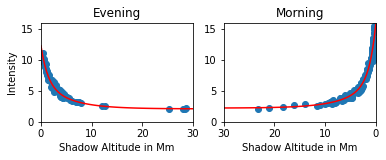

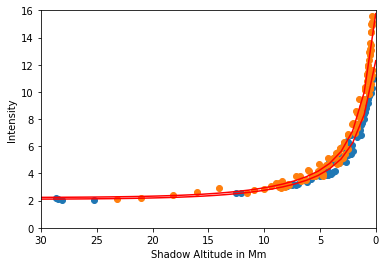

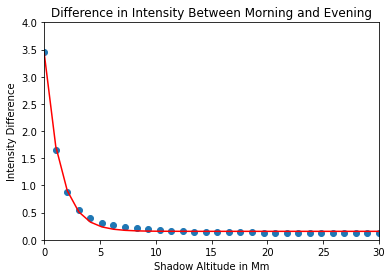

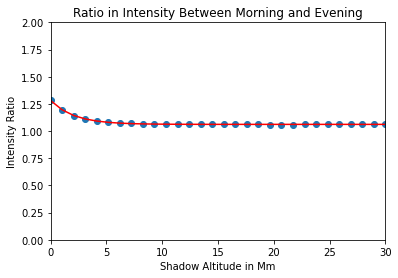

In [2]:
Data_Files = ['ns_out_03-02-00_d.out', 'ns_out_03-03-00_d.out', 'ns_out_03-04-00_d.out', 'ns_out_03-06-00_d.out', 'ns_out_03-07-00_d.out']
Data_Parser(Data_Files)